In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
import os
import pandas as pd
from astropy import constants as const

x=np.arange(4000,7000,0.001)
t_x = np.arange(4000,7000,1)

total_f_ratio = 5.15
ratio_6560 = 6560.47 / 1025.27

def R_Flux(F0,lam,lam_i,del_lam_i, ratio , flux_L , eff , Fc):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2/2) 
    return ((fl) / ratio**2) * (eff * flux_L) + Fc

def Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def Data_R_Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def total_flux(f,x ,fc):
    ft = 0
    dx = x[1]- x[0]
    for ii, flux in enumerate(f) :
        ft += (flux-fc)*dx #*x[ii] 
    return ft

def test_flux(f,x):
    flux = f*x *np.sqrt(2*np.pi)
    return flux

warng pyCloudy config: pyCloudy works better with matplotlib Triangulation


In [3]:
path_6741 = r"/home/jin/Cloudy/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
path_6884 = r"/home/jin/Cloudy/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
path_6886 = r"/home/jin/Cloudy/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
path_6881 = r"/home/jin/Cloudy/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
path_H_4_1 = r"/home/jin/Cloudy/PNe.tar-20240415T105820Z-001/PNe/PNe/H_4_1.txt"
path_Hen_2_447 = r"/home/jin/Cloudy/PNe.tar-20240415T105820Z-001/PNe/PNe/Hen_2_447.txt"
path_Hu_2_1 = r"/home/jin/Cloudy/PNe.tar-20240415T105820Z-001/PNe/PNe/Hu_2_1.txt"
path_J_900 = r"/home/jin/Cloudy/PNe.tar-20240415T105820Z-001/PNe/PNe/J_900.txt"
path_M_1_8 = r"/home/jin/Cloudy/PNe.tar-20240415T105820Z-001/PNe/PNe/M_1_8.txt"
path_NGC_2346 = r"/home/jin/Cloudy/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2346.txt"
path_NGC_2392 = r"/home/jin/Cloudy/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2392.txt"
path_NGC_3242 = r"/home/jin/Cloudy/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_3242.txt"


header = ['lambda', 'flux']
# Real_data = pd.read_csv(path,delim_whitespace=True,names=header)
# lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()

NGC_3242

2.465988e-14


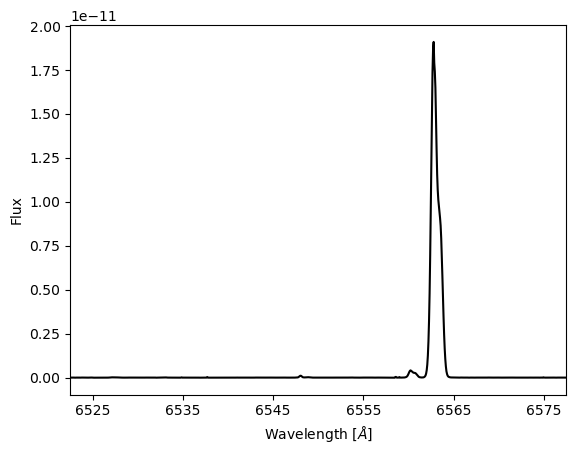

In [41]:
Real_data = pd.read_csv(path_NGC_3242,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()
plt.plot(lam,flux,'k')
x_min,x_max=6525.0,6575.0

range_indices = (lam >= 6524) & (lam <= 6530)
filtered_flux = flux[range_indices]
max_flux_index_in_filtered = np.argmax(filtered_flux)
original_index = np.where(range_indices)[0][max_flux_index_in_filtered]

FC_indices = (lam >= 6524) & (lam <= 6525)
FC_flux = flux[FC_indices]


Fc = np.mean(FC_flux)
F_6527_p = flux[original_index]

#F_6560_p = 
#F_6560_lam = 
#F_6560_sigma = 

#F_6545_p = 
#F_6545_lam = 
#F_6545_sigma = 

#F_6527_p = 
#F_6527_lam = 
#F_6527_sigma = 

# x_6527 = np.arange(6510,6530,0.5)

# f_6527 = Flux(F_6527_p,x_6527,F_6527_lam ,F_6527_sigma,Fc)
# f_6560 = Flux(F_6560_p,x,F_6560_lam,F_6560_sigma,Fc)
# f_6545 = Data_R_Flux(F_6545_p,x,F_6545_lam,F_6545_sigma,Fc)

#eff = 
# f_RCE_eff =R_Flux(F_6560_p,x,F_6545_lam ,F_6560_sigma,ratio_6560,total_f_ratio ,eff,Fc)

lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )


x_flux = np.arange(x_min,x_max,0.01)
# f_6545_RD = Data_R_Flux(F_6545_p,x_flux,F_6545_lam,F_6545_sigma,Fc)
eff = 1.0
# f_R_1 =R_Flux(F_6560_p,x_flux,F_6560_lam,F_6560_sigma,ratio_6560,total_f_ratio ,eff,Fc)

# tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
# print('Total flux of RCE 1 case is = ',tot_f_ram_1)

# tot_f_obv_ram = total_flux(f_6545_RD,x_flux,Fc)
# print('Total flux of Observed case is = ',tot_f_obv_ram)

# print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

# eff = tot_f_obv_ram / tot_f_ram_1
# f_Raman =R_Flux(F_6560_p,x,F_6560_lam,F_6560_sigma,ratio_6560,total_f_ratio ,eff,Fc)



# plt.plot(x,f_Raman,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},eff))
# plt.plot(x_6527,f_6527,'y')
# plt.plot(x,f_6545,'r',lw=3,label='Gaussian Fit')


# plt.vlines(F_6527_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
# plt.vlines(F_6527_lam+ del_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
plt.xlim(x_min-2.5,x_max+2.5)
plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Flux') #($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)
plt.xticks(np.linspace(x_min,x_max,6))
# plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)

6.120365e-14


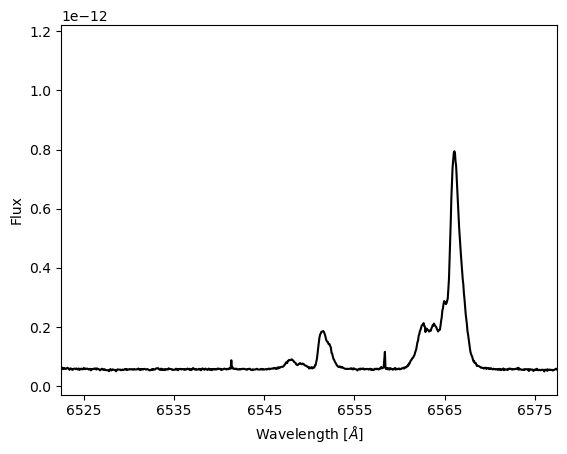

In [38]:
Real_data = pd.read_csv(path_NGC_2392,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()
plt.plot(lam,flux,'k')

range_indices = (lam >= 6524) & (lam <= 6530)
filtered_flux = flux[range_indices]
max_flux_index_in_filtered = np.argmax(filtered_flux)
original_index = np.where(range_indices)[0][max_flux_index_in_filtered]
F_6527_p = flux[original_index]


range_indices = (lam >= 6524) & (lam <= 6525)
FC_flux = flux[range_indices]
Fc = np.mean(FC_flux)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Flux') #($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)
plt.xticks(np.linspace(x_min,x_max,6))
# plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)